### Neural Networks for Abalone Dataset in Biology
We use "abalone", a biological dataset. The target feature is Rings: integer variable representing the age of the abalone (the number of rings on the shell). The goal of the dataset is to predict the age of the abalone (i.e., the number of rings) based on its physical characteristics. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#### 1. EDA (Reading, Cleaning and Visually Inspecting Data)

In [ ]:
df = pd.read_csv('abalone.csv')

In [2]:
df = df.dropna()

In [3]:
display(df)

Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0       M         0.455     0.365   0.095       0.5140         0.2245   
1       M         0.350     0.265   0.090       0.2255         0.0995   
2       F         0.530     0.420   0.135       0.6770         0.2565   
3       M         0.440     0.365   0.125       0.5160         0.2155   
4       I         0.330     0.255   0.080       0.2050         0.0895   
...   ...           ...       ...     ...          ...            ...   
4172    F         0.565     0.450   0.165       0.8870         0.3700   
4173    M         0.590     0.440   0.135       0.9660         0.4390   
4174    M         0.600     0.475   0.205       1.1760         0.5255   
4175    F         0.625     0.485   0.150       1.0945         0.5310   
4176    M         0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWeight  Rings  
0            0.1010       0.1500     15  
1            0.0485       0.0700      7  
2            0.1415       0.2100      9  
3            0.1140       0.1550     10  
4            0.0395       0.0550      7  
...             ...          ...    ...  
4172         0.2390       0.2490     11  
4173         0.2145       0.2605     10  
4174         0.2875       0.3080      9  
4175         0.2610       0.2960     10  
4176         0.3765       0.4950     12  

[4177 rows x 9 columns]

In [129]:
# we drop the first column w non-numerical values
df = df.drop(columns='Type')
df

LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0            0.455     0.365   0.095       0.5140         0.2245   
1            0.350     0.265   0.090       0.2255         0.0995   
2            0.530     0.420   0.135       0.6770         0.2565   
3            0.440     0.365   0.125       0.5160         0.2155   
4            0.330     0.255   0.080       0.2050         0.0895   
...            ...       ...     ...          ...            ...   
4172         0.565     0.450   0.165       0.8870         0.3700   
4173         0.590     0.440   0.135       0.9660         0.4390   
4174         0.600     0.475   0.205       1.1760         0.5255   
4175         0.625     0.485   0.150       1.0945         0.5310   
4176         0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWeight  Rings  
0            0.1010       0.1500     15  
1            0.0485       0.0700      7  
2            0.1415       0.2100      9  
3            0.1140       0.1550     10  
4            0.0395       0.0550      7  
...             ...          ...    ...  
4172         0.2390       0.2490     11  
4173         0.2145       0.2605     10  
4174         0.2875       0.3080      9  
4175         0.2610       0.2960     10  
4176         0.3765       0.4950     12  

[4177 rows x 8 columns]

### 2. Split Source and Target Sets

In [130]:
X = df.drop(columns='Rings')
y = df['Rings']
print(X)
print(y)

      LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0            0.455     0.365   0.095       0.5140         0.2245   
1            0.350     0.265   0.090       0.2255         0.0995   
2            0.530     0.420   0.135       0.6770         0.2565   
3            0.440     0.365   0.125       0.5160         0.2155   
4            0.330     0.255   0.080       0.2050         0.0895   
...            ...       ...     ...          ...            ...   
4172         0.565     0.450   0.165       0.8870         0.3700   
4173         0.590     0.440   0.135       0.9660         0.4390   
4174         0.600     0.475   0.205       1.1760         0.5255   
4175         0.625     0.485   0.150       1.0945         0.5310   
4176         0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWeight  
0            0.1010       0.1500  
1            0.0485       0.0700  
2            0.1415       0.2100  
3            0.1140       0.1550  
4       

In [131]:
# build the NN model  ---> THIS IS Mmodel1 IN MODEL1.PY FILE; REPLACE
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y)
history = model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256
)

Epoch 1/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.7732 - val_loss: 8.8823
Epoch 2/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3417 - val_loss: 6.0465
Epoch 3/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8062 - val_loss: 2.7031
Epoch 4/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7782 - val_loss: 2.2052
Epoch 5/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2079 - val_loss: 2.0503
Epoch 6/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0717 - val_loss: 1.9456
Epoch 7/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9596 - val_loss: 1.8694
Epoch 8/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8590 - val_loss: 1.8391
Epoch 9/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7482 - val_loss: 1.8520
Epoch 10/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8116 - val_loss: 1.8198
Epoch 11/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7790 - val_loss: 1.8094
Epoch 12/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8

In [134]:
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(15,10))

<AxesSubplot:>

## Overfitting/Underfitting
-Capacity of Model: complexity of samples it can learn

-Underfitting --> increase capacity: make NN wide by more units, or deeper by more layers.

-Early Stopping: use callback method

In [138]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # if no improvement on validation loss of min 0.001 stop
    patience=20, # num of epochs to wait before stopping
    restore_best_weights=True,
)

In [139]:
car_df

year  price  power_kw  mileage_in_km  brand
0       2011   9900     103.0       119000.0      2
1       2011   9290     118.0       184574.0      2
2       2011   9499      77.0       114860.0      2
3       2011  11990     103.0       205013.0      2
4       2011  10900     150.0       192350.0      2
...      ...    ...       ...            ...    ...
120791  2023  28788      81.0            5.0      0
120792  2023  28420      81.0         4900.0      0
120793  2023  59990     110.0        10500.0      0
120794  2023  30370     152.0           10.0      0
120795  2023  69990     110.0          501.0      0

[120796 rows x 5 columns]

In [143]:
X = car_df.drop(columns='price')
y = car_df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y)

from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[4]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer='adam',
    loss='mae'
)

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [145]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping],
    verbose=0 #turns off training log
)

min validation loss: 5620.78076171875


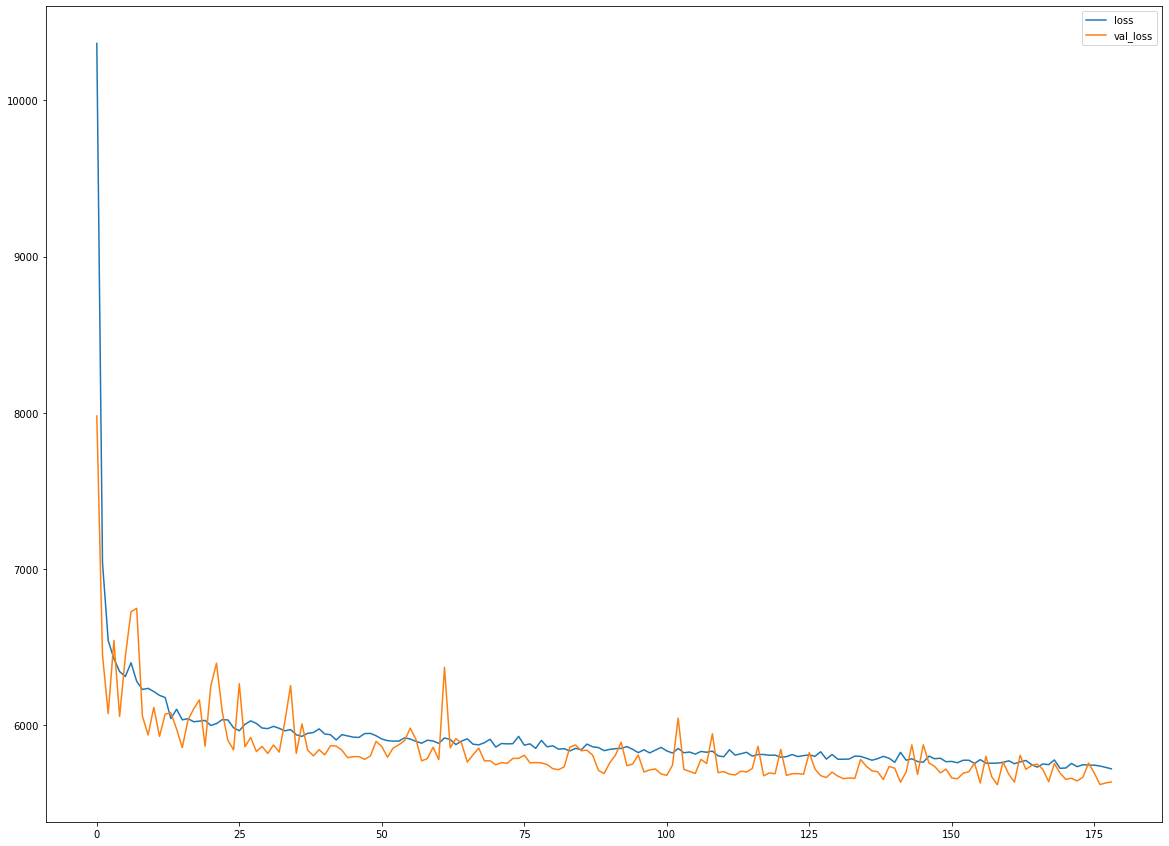

In [148]:
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(20,15))
print("min validation loss: {}".format(history_df['val_loss'].min()))

#### Note. Keras has stopped just after ~175 epochs, which is much earlier than 200

### Dropout and Normalisation

In [149]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Binary Classification

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Validation Loss: -410678.2812
Best Validation Accuracy: 0.0000


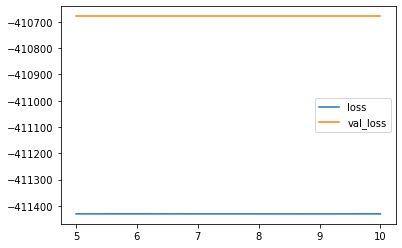

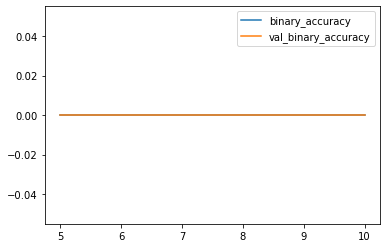

In [158]:
X = car_df.drop(columns='price')
y = car_df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y)

from tensorflow import keras
from tensorflow.keras import layers, callbacks

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[4]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))